In [1]:
import numpy as np                          # linear algebra
import os                                   # used for loading the data
from sklearn.metrics import confusion_matrix# confusion matrix to carry out error analysis
import seaborn as sn                        # heatmap
from sklearn.utils import shuffle           # shuffle the data
import matplotlib.pyplot as plt             # 2D plotting library
import cv2                                  # image processing library
import tensorflow as tf                     # best library ever
from sklearn import svm, datasets,metrics 
from keras import Sequential, optimizers
from keras.layers import Dense, Dropout, Flatten
from keras import layers

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Here's our 6 categories that we have to classify.
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6

In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['./seg_train/', './seg_test/']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory = dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            label_tmp = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                img_tmp = cv2.imread(img_path)
                img_tmp = cv2.resize(img_tmp, size)
                images.append(img_tmp)
                labels.append(label_tmp)
        images, labels = shuffle(images, labels)     
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels)= load_data()


In [5]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150, 3)


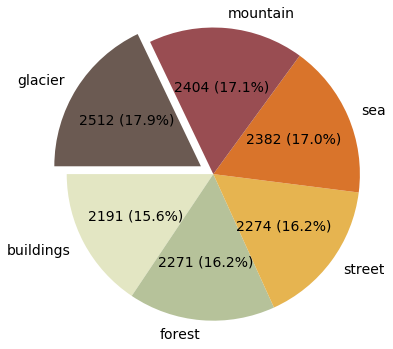

In [7]:
from matplotlib import cm
plt.rcParams['font.size'] = 14.0

# Plot a pie chart
plt.figure(figsize=(6,6))
sizes = np.bincount(train_labels)
sizes2 = np.sort(sizes)
explode = (0, 0, 0, 0, 0, 0.1)  
color = [[227/255,230/255,195/255,1] ,[182/255,194/255,154/255,1],[230/255,180/255,80/255,1],[217/255,116/255,43/255,1], [153/255,77/255,82/255,1],[107/255,90/255,82/255,1]]
# color = [[210/255,188/255,167/255,1],[248/255,147/255,29/255,1],[179/255,214/255,110/255,1],[95/255,92/255,51/255,1],[60/255,79/255,57/255,1],[17/255,63/255,61/255,1]]
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.1f}%)'.format(p=pct,v=val)
    return my_autopct

# color2 = np.sort(color)
class_names_2 = ['buildings','forest','street','sea','mountain','glacier']
# num = 0
# color = cm.Set2(np.arange(num,num+6)/6.)
plt.pie(sizes2, explode=explode,colors = color, labels=class_names_2, autopct=make_autopct(sizes),  startangle=180)
plt.axis('equal')
# plt.title('Proportion of each observed category')

plt.show()

In [8]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

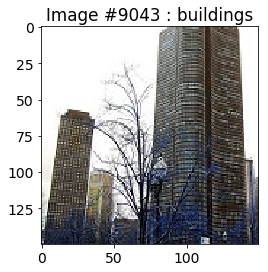

In [9]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

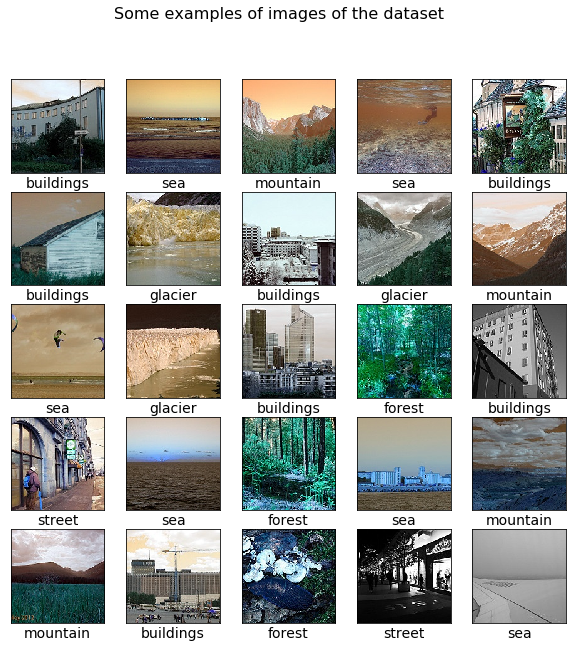

In [10]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
train_images_flatten = train_images.reshape(train_images.shape[0], -1)   # The "-1" makes reshape flatten the remaining dimensions
test_images_flatten = test_images.reshape(test_images.shape[0], -1)
train_labels_flatten = train_labels.reshape(train_labels.shape[0],-1)
test_labels_flatten = test_labels.reshape(test_labels.shape[0],-1)


print(np.shape(train_images_flatten))
print(np.shape(test_images_flatten))
print(np.shape(train_labels_flatten))
print(np.shape(train_images))


(14034, 67500)
(3000, 67500)
(14034, 1)
(14034, 150, 150, 3)


In [13]:
num =64;
model = Sequential()
model.add(Flatten(input_shape = (150,150,3))) # (14034, 150, 150) => (14034, 150*150)
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(
    optimizer=optimizers.adam(lr=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)
history = model.fit(train_images, train_labels, epochs=50, batch_size=512, validation_split = 0.2 ) # 512 images each epoch
scores = model.evaluate(train_images, train_labels)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 11227 samples, validate on 2807 samples
Epoch 1/50
11227/11227 [==============================] - 11s 988us/step - loss: 12.9109 - acc: 0.1605 - val_loss: 13.5858 - val_acc: 0.1571
Epoch 2/50
11227/11227 [==============================] - 2s 163us/step - loss: 13.6057 - acc: 0.1559 - val_loss: 13.5858 - val_acc: 0.1571
Epoch 3/50
11227/11227 [==============================] - 2s 150us/step - loss: 13.6057 - acc: 0.1559 - val_loss: 13.5858 - val_acc: 0.1571
Epoch 4/50
11227/11227 [==============================] - 2s 172us/step - loss: 13.6057 - acc: 0.1559 - val_loss: 13.5858 - val_acc: 0.1571
Epoch 5/50
11227/11227 [==============================] - 2s 175us/step - loss: 13.6057 - acc: 0.1559 - val_loss: 13.5858 - val_acc: 0.1571
Epoch 6/50
11227/11227 [==============================] - 2s 160us/step - loss: 13.6057 - acc: 0.1559 - val_loss: 13.5858 - val_acc: 0.1571
Epoch 7/50
11227/11227 [==============================] - 2s 170us/step - loss: 13.6057 - acc: 0.1559 - val_lo

In [14]:
scores = model.evaluate(train_images, train_labels)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores2 = model.evaluate(test_images, test_labels)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores2[1]*100))


14034/14034 [==============================] - 2s 172us/step

acc: 15.61%
3000/3000 [==============================] - 1s 393us/step

acc: 14.57%


In [15]:
print("Training set Accuracy: %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Testing set Accuracy: %s: %.2f%%" % (model.metrics_names[1], scores2[1]*100))
print("Training set Error: %s: %.2f%%" % (model.metrics_names[1], 100-scores[1]*100))
print("Testing set Error: %s: %.2f%%" % (model.metrics_names[1], 100-scores2[1]*100))

Training set Accuracy: acc: 15.61%
Testing set Accuracy: acc: 14.57%
Training set Error: acc: 84.39%
Testing set Error: acc: 85.43%


In [51]:
num =64;
model2 = Sequential()
model2.add(Flatten(input_shape = (150,150,3))) # (14034, 150, 150) => (14034, 150*150)
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(num, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))
model2.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)
# history3 = model3.fit(train_images, train_labels, epochs=5, batch_size=512,validation_split = 0.2, verbose=0) # 每批512张图片
history2 = model2.fit(train_images, train_labels, epochs=50, batch_size=512, validation_split = 0.2 ) 
scores = model2.evaluate(train_images, train_labels)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

Train on 11227 samples, validate on 2807 samples
Epoch 1/50
11227/11227 [==============================] - 4s 351us/step - loss: 1.7472 - acc: 0.1953 - val_loss: 1.6642 - val_acc: 0.2996
Epoch 2/50
11227/11227 [==============================] - 2s 140us/step - loss: 1.6265 - acc: 0.3264 - val_loss: 1.5357 - val_acc: 0.3969
Epoch 3/50
11227/11227 [==============================] - 2s 145us/step - loss: 1.4773 - acc: 0.3928 - val_loss: 1.4021 - val_acc: 0.4467
Epoch 4/50
11227/11227 [==============================] - 2s 145us/step - loss: 1.3689 - acc: 0.4583 - val_loss: 1.3372 - val_acc: 0.4571
Epoch 5/50
11227/11227 [==============================] - 2s 157us/step - loss: 1.3297 - acc: 0.4739 - val_loss: 1.3408 - val_acc: 0.4656
Epoch 6/50
11227/11227 [==============================] - 2s 147us/step - loss: 1.2497 - acc: 0.5059 - val_loss: 1.2513 - val_acc: 0.5130
Epoch 7/50
11227/11227 [==============================] - 1s 132us/step - loss: 1.2100 - acc: 0.5255 - val_loss: 1.2479 - v

In [52]:
scores3 = model2.evaluate(train_images, train_labels)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores3[1]*100))
scores4 = model2.evaluate(test_images, test_labels)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores4[1]*100))


14034/14034 [==============================] - 3s 199us/step

acc: 72.33%
3000/3000 [==============================] - 1s 288us/step

acc: 57.27%


In [76]:
print("Training set Accuracy: %.2f%%" % ( scores3[1]*100))
print("Testing set Accuracy: %.2f%%" % (scores4[1]*100))
print("Training set Error: %.2f%%" % ( 100-scores3[1]*100))
print("Testing set Error: %.2f%%" % (100-scores4[1]*100))

Training set Accuracy: 72.33%
Testing set Accuracy: 57.27%
Training set Error: 27.67%
Testing set Error: 42.73%


In [135]:
train_error = 1-np.asarray(history2.history['acc'])
val_error = 1-np.asarray(history2.history['val_acc'])

<Figure size 560x400 with 0 Axes>

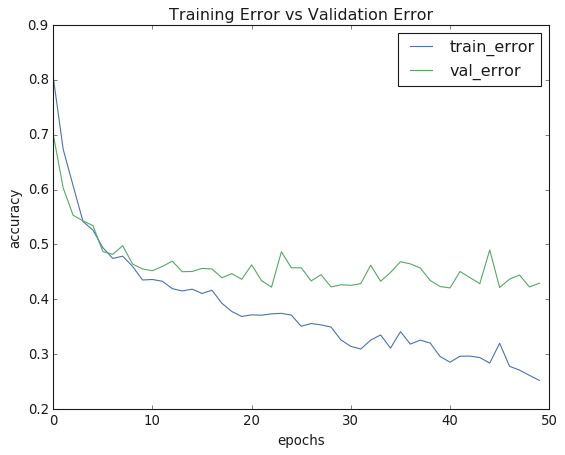

In [136]:
fig = plt.figure(figsize=(7,5))
plt.figure(facecolor='white')
plt.plot(train_error,label = "train_error")
plt.plot(val_error,  label = "val_error")
plt.title("Training Error vs Validation Error")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc='best')

plt.show()

<Figure size 560x400 with 0 Axes>

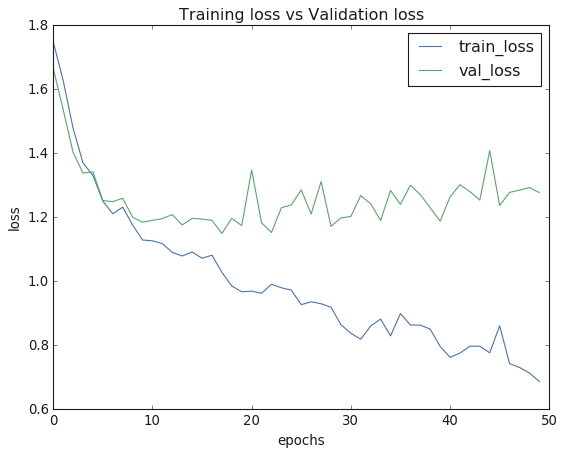

In [102]:
fig = plt.figure(figsize=(7,5))
plt.figure(facecolor='white')
plt.plot(history2.history['loss'], label = "train_loss")
plt.plot(history2.history['val_loss'], label = "val_loss")
plt.title("Training loss vs Validation loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [31]:
test_loss = model2.evaluate(test_images, test_labels)

3000/3000 [==============================] - 1s 270us/step


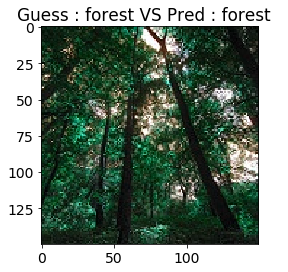

In [41]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model2.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

In [42]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()

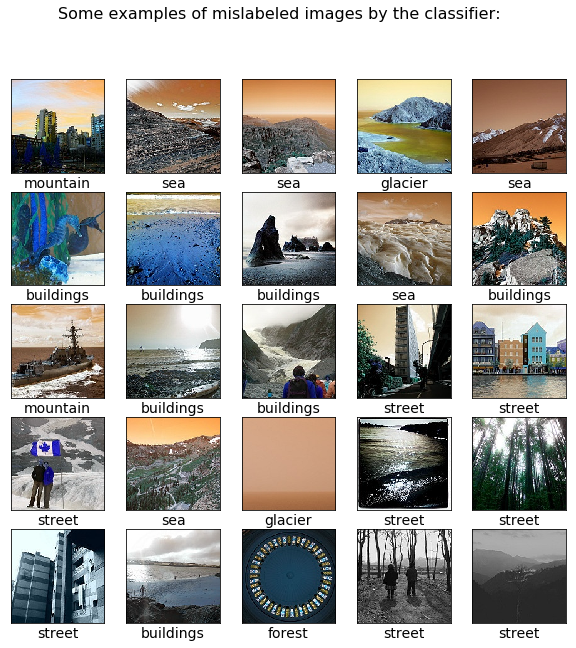

In [43]:
predictions = model2.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

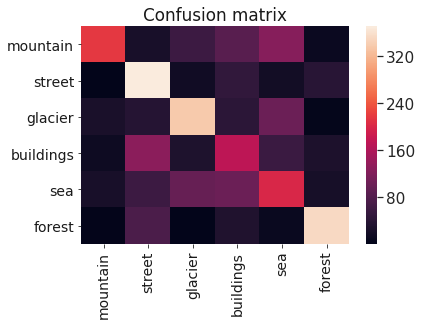

In [44]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=False,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()